In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h2>Simple Quadratic Relationship Dataset</h2>
<h4>Hands-on: Linear Regression with AWS Machine Learning Service</h4>
Input Features: x<br>
Target Feature: y_noisy<br>
Objective: Predict y_noisy for a given x<br>

In [2]:
def quad_func (x):
    return 5*x**2 -23*x + 47

In [3]:
quad_func(25)

2597

In [4]:
quad_func(1.254)

26.020580000000002

In [5]:
np.random.seed(5)
samples = 300
x_vals = pd.Series(np.random.uniform(-20,20, samples))
y_vals = x_vals.map(quad_func)
# Add random noise
y_noisy_vals = y_vals + np.random.randn(samples) * 3

In [6]:
df = pd.DataFrame({'x':x_vals,'y':y_vals, 'y_noisy':y_noisy_vals})

In [7]:
df.head()

,x,y,y_noisy
0,-11.120273,921.068658,921.016598
1,14.829292,805.465821,805.082846
2,-11.731234,1004.927608,999.503858
3,16.744436,1063.758703,1066.740610
4,-0.463552,58.736111,54.262724


In [8]:
# Correlation will indicate how strongly features are related to the output
df.corr()

,x,y,y_noisy
x,1.000000,-0.398174,-0.398055
y,-0.398174,1.000000,0.999990
y_noisy,-0.398055,0.999990,1.000000


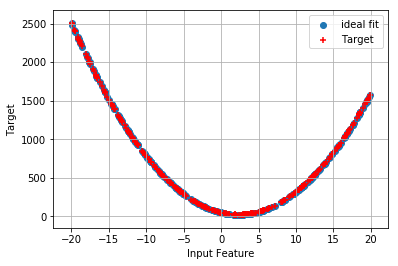

In [10]:
plt.scatter(x=df.x,y=df.y,label='ideal fit')
plt.scatter(x=df.x,y=df.y_noisy, color='r',marker='+',label='Target')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.legend()

In [11]:
# Save all data
df.to_csv('quadratic_all.csv',index=False,
          columns=['x','y','y_noisy'])

## Training and Validation Set
### Target Variable as first column followed by input features: y_noisy, x
### Training, Validation files do not have a column header

In [12]:
# Training = 70% of the data
# Validation = 30% of the data
# Randomize the datset
np.random.seed(5)
l = list(df.index)
np.random.shuffle(l)
df = df.iloc[l]

In [13]:
rows = df.shape[0]
train = int(.7 * rows)
test = int(.3 * rows)

In [14]:
rows, train, test

(300, 210, 90)

In [15]:
# Write Training Set
df[:train].to_csv('quadratic_train.csv'
                          ,index=False,index_label='Row',header=False
                          ,columns=['y_noisy','x'])

In [16]:
# Write Validation Set
df[train:].to_csv('quadratic_validation.csv'
                          ,index=False,index_label='Row',header=False
                          ,columns=['y_noisy','x'])